In [2]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}" .format(mglearn.__version__))
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

Python version: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.3
matplotlib version: 2.1.0
NumPy version: 1.13.3
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.1
mglearn version: 0.1.6


In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

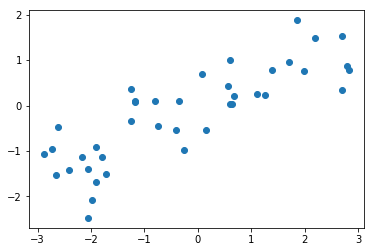

In [4]:
plt.plot(X,y,"o")

In [5]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))


Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


# Print R-squared


In [6]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test set R^2: 0.83


## Analyzing KNeighborsRegressor

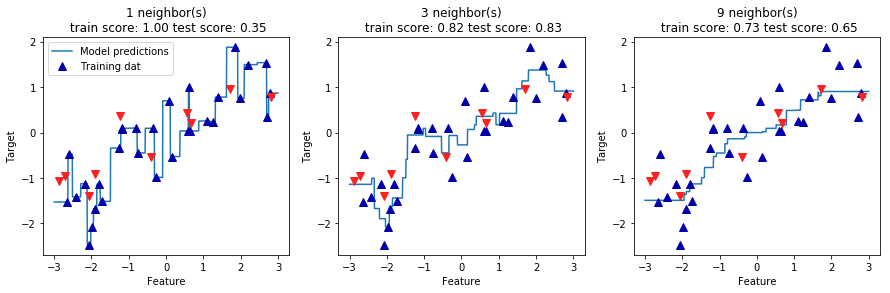

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training dat"])

Two important parameters to Kneighbors classifier: 
- number of neighbours
- how you measure distance between data points

In practicse, small number of neighbours like 3-5 will work well. Best to adjust by using some method like the above. Euclidean distance works well in most settings, i.e

$$C^2 = A^2 + B^2$$



Advantages of KNN:
- Easy to understand
- Gives reasonable performance wiuthout need for a lot of adjustments

Disadvantaqes of KNN:
- Can be very slow with a lot of data
- preprocessing data is required
- may not perform well with datasets with many features
- Bad with datasets where most features are 0 (sparse data sets)



